## 2.1 Introduction

## 2.2 Variable Types and Terminology

Naming convention for the prediction tasks:
- **regression** when we predict quantitative outputs
- **classification** when we predict qualitative outputs

## 2.3 Two Simple Approaches to Prediction: Least Squares and Nearest Neighbors

### 2.3.1 Linear Models and Least Squares

Given a vector of inputs $X^T = (X_1, X_2, ..., X_p)$, we predict the output $Y$ via the model

$$\hat{Y} = \hat{\beta_0} + \sum_{j=1}^{p}X_j \hat{\beta_j}$$

The term $\hat{\beta_0}$ is the intercept, also known as the **bias**. Often it is convenient to include the constant variable $1$ in $X$, include $\hat{\beta_0}$ in the vector $\hat{\beta}$, and then write the linear model in vector form as an inner product

$$\hat{Y} = X^T\hat{\beta}$$

The most popular method to fit the linear model to the set of training data is the method of **least squares**. In this approach, we pick the coefficients $\beta$ to minimize the residual sum of squares

$$\operatorname{RSS}(\beta) = \sum_{i=1}^{N} (y_i - x_i^T\beta)^2$$

The solution is easiest to characterize in matrix notation. We can write

$$\operatorname{RSS}(\beta) = (\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y} - \mathbf{X}\beta)$$

Differentiating w.r.t. $\beta$ we get the **normal equations**

$$\mathbf{X}^T(\mathbf{y} - \mathbf{X}\beta) = 0$$

If $\mathbf{X}^T\mathbf{X}$ is nonsingular, then the unique solution is given by

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

Intuitively, it seems that we do not need a very large data set to fit such a model.

In [1]:
import c2
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

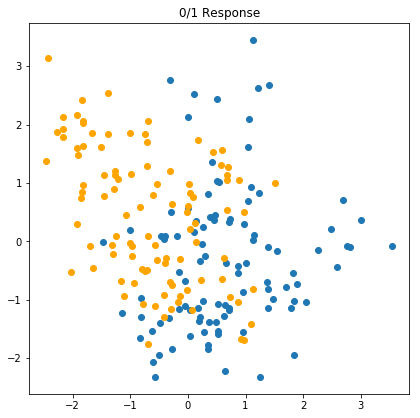

In [6]:
data_x, data_y = c2.generate_data(sample_size=100)
sample_blue = data_x[data_y == 0, :]
sample_orange = data_x[data_y == 1, :]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(221)
ax.plot(sample_blue[:, 0], sample_blue[:, 1], 'o')
ax.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='orange')
ax.set_title('0/1 Response')
plt.show()

After the linear model is fit on the data, there are several misclassifications on both side of the decision boundary. Consider the two possible scenarios:
- **Scenario 1**: The training data in each class was generated from bivariate Gaussian distributions with uncorrelated components and different menas.
- **Scenario 2**: The training data in each class came from a mixture of 10 low-variance Gaussian distributions, with individual means themselves distributed as Gaussian.

In the case of one Gaussian per class, we will see in Chapter 4 that a linear decision boundary is the best one can do, and that our estimate is almost optimal. In the case of mixtures of tightly clustered Gaussian, a linear decision boundary is unlikely to be optimal, and in fact is not. The optimal decision boundary is nonlinear and disjoint, and as such will be much more difficult to obtain.

### 2.3.2 Nearest-Neighbor Methods

Nearest-neighbor methods use those obervations in the training set $\mathcal{T}$ closest in input space to $x$ to form $\hat{Y}$. Specifically, the $k$-nearest neighbor fit for $\hat{Y}$ is defined as

$$\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i$$

where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample.

When $k = 1$, it is an 1-nearest-neighbor classification: $\hat{Y}$ is assigned the value $y_l$ of the closest point $x_l$ to $x$ in the training data. In this case, the regions of classification can be computed relatively easily, and correspond to a **Voronoi tesselation** of the training data, where each point $x_i$ has an associated tile bounding the region for which it is the closest input point.

We can see that far fewer training observations are misclassified when using k-nearest-neighbor instead of least squares. This should not give too much comfort, since none of training data are misclassified when using 1-nearest-neighbor. A little thought suggests that for k-nearest-neighbor fits, the error on the training data should be approximately an increasing function of $k$, and will always be $0$ for $k = 1$.

It appears that k-nearest-neighbor fits have a single parameter, $k$, compared to the $p$ parameters in least-squares fits. Although this is the case, we will see that the **effective** number of parameters of k-nearest-neighbors is $N/k$ and is generally bigger than $p$. Note that if the neighborhoods were nonoverlapping, there would be $N/k$ neighborhoods and we would fit one parameter (a mean) in each neighborhood.

It is also clear that we cannot use sum-of-squared errors on the training set as a criterion for picking $k$, since we would always pick $k = 1$! It would seem that k-nearest-neighbor methods would be more appropriate for the mixture Scenario 2, while for Gaussian data, the decision boundaries of k-nearest-neighbor would be unnecessarily noisy.

### 2.3.3 From Least Squares to Nearest Neighbors

- Least squares: low variance and potentially high bias
- k-nearest-neighbor: high variance and low bias

Each method has its own situations for which it works best; linear regression is more appropriate for Scenario 1, while nearest neighbor are more suitable for Scenario 2.

The data in fact were simulated from a model somewhere between the two, but closer to Scenario 2. First we generated 10 means $m_k$ from a bivariate Gaussian distribution $N((1, 0)^T, \mathbf{I})$ and labeled this class blue. Similarly, 10 more were drawn from $N((0, 1)^T, \mathbf{I})$ and labeled class orange. Then for each class we generated 100 observations as follows: for each observation, we picked an $m_k$ at random with probability $1/10$, and then generated a $N(m_k, \mathbf{I}/5)$, thus leading to a mixture of Gaussian clusters for each class.

A large subset of the most popular techniques in use today are variants of these two simple procedures. In fact, 1-nearest-neighbor, the simplest of all, captures a large percentage of the market for low-dimensional problems. The following list describes some ways in which these simple procedures have been enhanced:
- Kernel methods use weights that decrease smoothly to zero with distance from the target point, rather than the effective 0/1 weights used by k-nearest neighbors.
- In high-dimensional spaces the distance kernels are modified to emphasize some variable more than others.
- Local regression its linear models by locally weighted least squares, rather than fitting constants locally.
- Linear models fit to a basis expansion of the original inputs allow arbitrarily complex models.
- Projection pursuit and nueral network models consist of sums of non-linearly transformed linear models.

## 2.4 Statistical Decision Theory

We first consider the case of a quantitative output, and place ourselves in the world of random variables and probability spaces. Let $X \in \mathbb{R}^p$ denote a real valued random input vector, and $Y \in \mathbb{R}$ a real valued random output variable, with joint distribution $\operatorname{Pr}(X, Y)$. We seek a function $f(X)$ for predicting $Y$ given values of the input $X$. This theory requires a **loss function** $L(Y, f(X))$ for penalizing errors in prediction, and by far the most common and convenient is **squared error loss**: $L(Y, f(X)) = (Y - f(X))^2$. This leads to a criterion for choosing $f$:

$$\begin{align*}\operatorname{EPE}(f) & = \operatorname{E}(Y - f(X))^2\\
& = \int \left[y - f(x)\right]^2\operatorname{Pr}(dx, dy)\end{align*}$$

the expected (squared) prediction error. By conditioning on $X$, we can write $\operatorname{EPE}$ as

$$\operatorname{EPE}(f) = \operatorname{E}_X\operatorname{E}_{Y \mid X} \left(\left[Y - f\left(X\right)\right]^2 \mid X\right)$$

and we see that it suffices to minimize $\operatorname{EPE}$ pointwise:

$$f(x) = \operatorname{argmin}_c\operatorname{E}_{Y \mid X} \left(\left[Y - c\right]^2 \mid X = x\right)$$

The solution is

$$f(x) = \operatorname{E}(Y \mid X = x)$$

the conditional expectation, also known as the **regression function**. Thus the best prediction of $Y$ at any point $X = x$ is the conditional mean, when best is measured by average squared error.